In [129]:
#ALY 6020 Module 4 Project
#Part 1 Data Cleansing
#'C:\\Users\\seanm\\Downloads\\Nashville_housing_data.csv'
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('C:\\Users\\seanm\\Downloads\\Nashville_housing_data.csv')

# Convert target variable to numeric
df['Sale Price Compared To Value'] = df['Sale Price Compared To Value'].map({'Under': 0, 'Over': 1})

# Drop rows with missing target values
df = df.dropna(subset=['Sale Price Compared To Value'])

# Fill missing values in numeric columns
df.fillna({
    'Finished Area': df['Finished Area'].median(),
    'Bedrooms': df['Bedrooms'].median(),
    'Full Bath': df['Full Bath'].median(),
    'Half Bath': df['Half Bath'].median()
}, inplace=True)

# Define numeric and categorical columns
numeric_features = ['Acreage', 'Neighborhood', 'Land Value', 'Building Value',
                     'Finished Area', 'Year Built', 'Bedrooms', 'Full Bath', 'Half Bath']
categorical_features = ['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale',
                         'City', 'State', 'Tax District', 'Foundation Type', 'Exterior Wall', 'Grade']

# Drop irrelevant columns
df = df.drop(columns=['Sale Date', 'Unnamed: 0', 'Parcel ID', 'Suite/ Condo   #'])

# Display the first 5 rows of the dataset
print(df.head())

# Display information about the DataFrame
print(df.info())

# Display descriptive statistics for numeric columns
print(df.describe())

# Define features and target
X = df.drop(columns=['Sale Price Compared To Value'])
y = df['Sale Price Compared To Value']

#Part 2: Linear Regression Model
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ]), categorical_features)
    ])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to build and evaluate models
def build_and_evaluate_model(model):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

#Parts 3-5: Decision Tree Model, Random Forest Model, and Gradient Boost Model
# Initialize and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

#Part 6: Model Comparison
for name, model in models.items():
    mse, r2 = build_and_evaluate_model(model)
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared: {r2}")

        Land Use   Property Address Property City   Legal Reference  \
0  SINGLE FAMILY   1802  STEWART PL     NASHVILLE  20130118-0006337   
1  SINGLE FAMILY  2761  ROSEDALE PL     NASHVILLE  20130124-0008033   
2  SINGLE FAMILY  224  PEACHTREE ST     NASHVILLE  20130128-0008863   
3  SINGLE FAMILY      316  LUTIE ST     NASHVILLE  20130131-0009929   
4  SINGLE FAMILY   2626  FOSTER AVE     NASHVILLE  20130118-0006110   

  Sold As Vacant Multiple Parcels Involved in Sale       City State  Acreage  \
0             No                                No  NASHVILLE    TN     0.17   
1             No                                No  NASHVILLE    TN     0.11   
2             No                                No  NASHVILLE    TN     0.17   
3             No                                No  NASHVILLE    TN     0.34   
4             No                                No  NASHVILLE    TN     0.17   

              Tax District  ...  Building Value  Finished Area  \
0  URBAN SERVICES DISTRICT

C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Linear Regression:
  Mean Squared Error: 0.18137884965967493
  R-squared: 0.03786260438298872


C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Decision Tree:
  Mean Squared Error: 0.3502798621839673
  R-squared: -0.8580851900379831


C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Random Forest:
  Mean Squared Error: 0.20433124291275054
  R-squared: -0.08389004709278747
Gradient Boosting:
  Mean Squared Error: 0.17602821143968078
  R-squared: 0.06624545680229454


C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


C:\Users\seanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


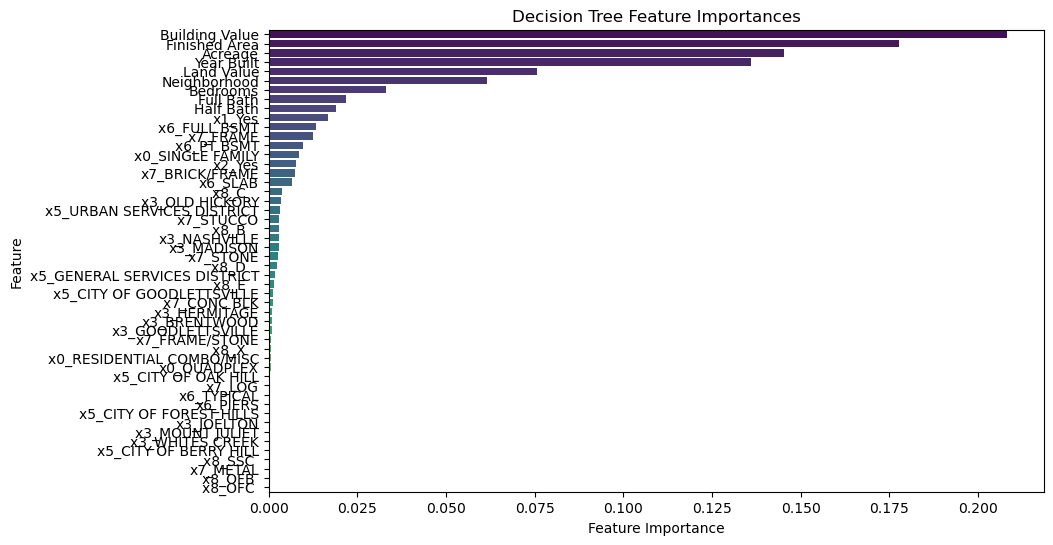

C:\Users\seanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


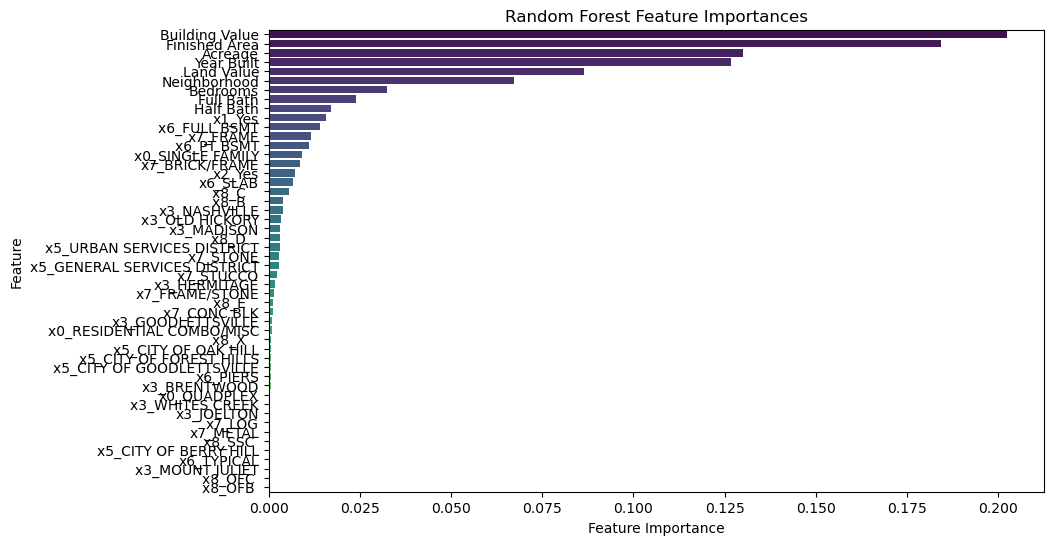

C:\Users\seanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


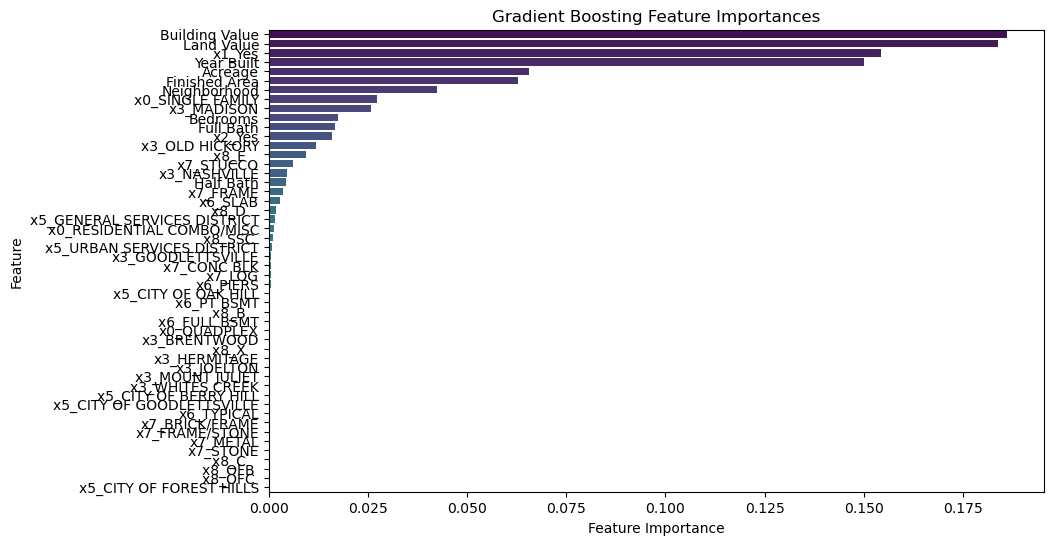

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importances(model, feature_names, title):
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices], palette='viridis')
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

# Initialize and fit models
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeRegressor(random_state=42))])
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor(random_state=42))])

pipeline_dt.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_gb.fit(X_train, y_train)

# Extract fitted models
dt_model_fitted = pipeline_dt.named_steps['model']
rf_model_fitted = pipeline_rf.named_steps['model']
gb_model_fitted = pipeline_gb.named_steps['model']

# Extract feature names after one-hot encoding
cat_feature_names = list(pipeline_rf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())
all_feature_names = numeric_features + cat_feature_names

# Plot feature importances
plot_feature_importances(dt_model_fitted, all_feature_names, 'Decision Tree Feature Importances')
plot_feature_importances(rf_model_fitted, all_feature_names, 'Random Forest Feature Importances')
plot_feature_importances(gb_model_fitted, all_feature_names, 'Gradient Boosting Feature Importances')


C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\seanm\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

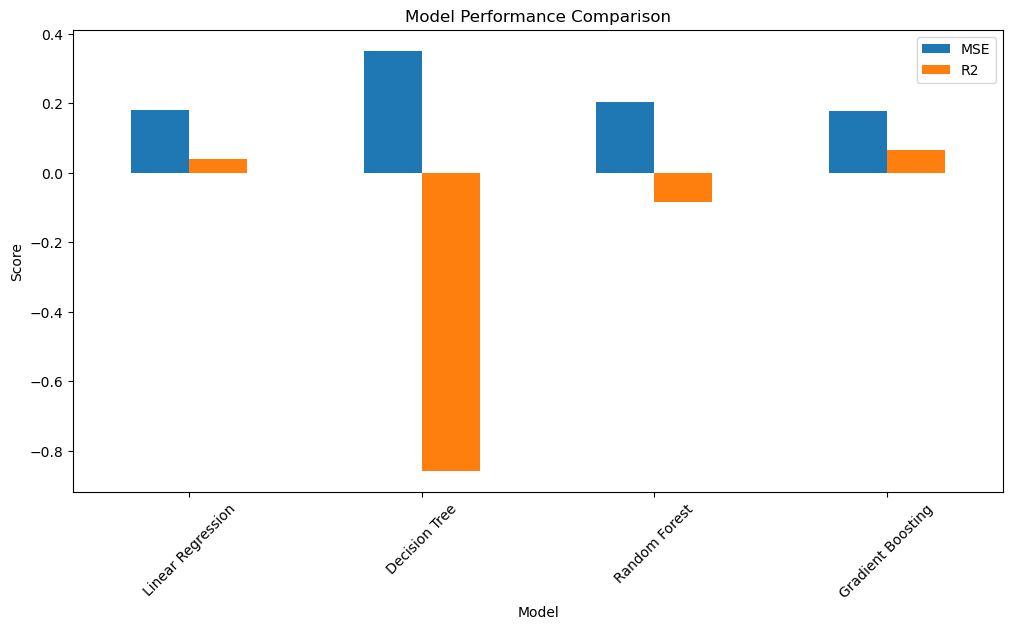

In [140]:
# Collect performance metrics
results = {}
for name, model in models.items():
    mse, r2 = build_and_evaluate_model(model)
    results[name] = {'MSE': mse, 'R2': r2}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T

# Plot performance metrics
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()